# Monte Carlo aplicado à vazão

A partir de:
- Um histórico de vazão existente
- Número de itens de um backlog

Fazemos 100000 simulações de conclusão do Backlog com a inteção de identificamos a probabilidade de uma data ser o momento de conclusão do Backlog.

Com os dados reais e o número de simulações configurados e registrados nas variáveis acima, geramos as simulações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
from prettytable import PrettyTable

def generate_simulations(throughtput, remaning_items, number_of_simulations=10000):
    simulations = []
    for s in range(number_of_simulations):
        i = remaning_items
        simulation = []

        while i >= 0:
            t = np.random.choice(throughtput)
            simulation.append(t)
            i -= t
            
        simulations.append(simulation)
        
    return simulations

def duration_of_each_simulation(simulations):
    durations = []
    for s in simulations:
        durations.append(len(s))
    
    return durations

def date_probability(arr, percentile, cycle_size = 7):
    cycles = np.percentile(arr, percentile)
    probably_date = date.today() + timedelta(cycle_size * cycles)
    
    return [percentile, cycles, str(probably_date)]

def table_of_probability(data, time):
    t = PrettyTable(["Probability","Weeks","Forecast Date"])
    t.add_row(date_probability(data, 95, time))
    t.add_row(date_probability(data, 85, time))
    t.add_row(date_probability(data, 75, time))
    t.add_row(date_probability(data, 50, time))
    
    return t

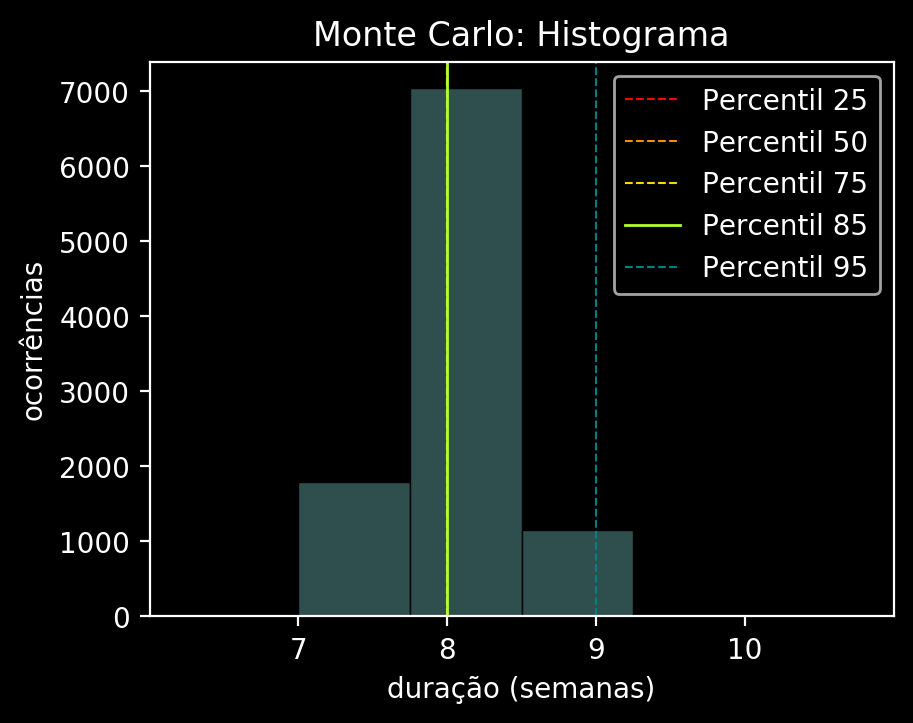

<Figure size 600x800 with 0 Axes>

+-------------+-------+---------------+
| Probability | Weeks | Forecast Date |
+-------------+-------+---------------+
|      95     |  9.0  |   2023-02-22  |
|      85     |  8.0  |   2023-02-07  |
|      75     |  8.0  |   2023-02-07  |
|      50     |  8.0  |   2023-02-07  |
+-------------+-------+---------------+


In [2]:
historical_throughtput = [6,8,7,5,8]
#historical_throughtput = [2,3,4,4,5]
#historical_throughtput = [1.547948,1.453162,2.201786,1.620000,1.505000,1.537289]
#historical_throughtput = [9.77,7.12,21.83,20.12,17.52,10.8]
#historical_throughtput = [4,2,4,3,5,5,5]
#historical_throughtput = [9,9,2,6,17,5,9]
#historical_throughtput = [1,5,4,4,4,2,4,3,25,3]
remaning_items_in_backlog = 50
#remaning_items_in_backlog = 57
#remaning_items_in_backlog = 22.362851
cycle_size = 15 # in days
simulations_number = 10000

s = generate_simulations(historical_throughtput, remaning_items_in_backlog, simulations_number)
d = duration_of_each_simulation(s)
t = table_of_probability(d, cycle_size)


fig, ax = plt.subplots()
ax.hist(d, bins=max(d)-min(d)+1, linewidth=0.5, edgecolor="k", color='darkslategray')
ax.set(xlim=(min(d)-1, max(d)+1), xticks=np.arange(min(d), max(d)+1))

ax.axvline(np.percentile(d,25), color='red', linestyle='dashed', linewidth=0.75, label='Percentil 25')
ax.axvline(np.percentile(d,50), color='darkorange', linestyle='dashed', linewidth=0.75, label='Percentil 50')
ax.axvline(np.percentile(d,75), color='gold', linestyle='dashed', linewidth=0.75, label='Percentil 75')
ax.axvline(np.percentile(d,85), color='greenyellow', linestyle='solid', linewidth=1, label='Percentil 85')
ax.axvline(np.percentile(d,95), color='teal', linestyle='dashed', linewidth=0.75, label='Percentil 95')
#ax.axvline(np.percentile(d,100), color='w', linestyle='dashed', linewidth=0.25, label='Percentil 100')
#ax.axvline(np.percentile(d,0), color='w', linestyle='dashed', linewidth=0.25, label='Percentil 0')

ax.legend(loc='upper right')

ax.set_title('Monte Carlo: Histograma')
ax.set_xlabel('duração (semanas)')
ax.set_ylabel('ocorrências')

plt.figure(figsize=(6, 8))
plt.show()

fig.savefig('monte-carlo.png',format='png',facecolor='k',edgecolor='k')

print(t)

#savefig(fname, *, dpi='figure', format=None, metadata=None,
#        bbox_inches=None, pad_inches=0.1,
#        facecolor='auto', edgecolor='auto',
#        backend=None, **kwargs
#       )
#ax.plot(max(d)-min(d), y, 'k--', linewidth=1.5, label='Theoretical')
